<font face="黑体">我是黑体字</font>  
<font face="微软雅黑">我是微软雅黑</font>  
<font face="STCAIYUN">我是华文彩云</font>  
<font color=red>我是红色</font>  
<font color=#008000>我是绿色</font>  
<font color=Blue>我是蓝色</font>  
<font size=5>我是尺寸</font>  
<font face="黑体" color=green size=5>我是黑体，绿色，尺寸为5</font> 

### **基础打印示例**

In [ ]:
print("hello world")
name = "Zeal"
age = 23
print("My name is {} and I am {} years old.".format(name, age))
print(f"My name is {name}, and 1 + 1 = {1 + 1}")
print(name, age, age, age, sep = ', ')
print("Hi~" * 10)

### **用 `enumerate` 迭代一个链表可以同时获取其index和值**


In [ ]:
items = ['a', 'b', 'c', 'd']

for idx, item in enumerate(items):
    print(f"{idx}: {item}")

### **访问字典的不同方法**

In [ ]:
userData = {
    'name'  : 'Sally',
    'age'   : 18, 
    'height': '186cm'
}

for user in userData.items():
    print(user)
print("====================")

for user in userData.keys():
    print(user)

print("====================")
for user in userData.values():
    print(user)

### **获取数组的维度**

In [ ]:
import numpy as np

a = np.array(42)
b = np.array([1, 2, 3, 4, 5])
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])

# dimensions
print(a.ndim)
print(b.ndim)
print(c.ndim)
print(d.ndim)

### **Python 虚拟环境指令**
* python -m virtualenv venv/  
* source venv/Scripts/activate  
* deactivate  

### **打包和安装模块包指令** 
* pip freeze > requirements.txt # Save modules  
* pip install -r requirements.txt  


### **异常处理示例**

In [ ]:
def _sqrt(x):
    if x < 0:
        raise Exception(f"Error, sqrt input {x} < 0")
    return x**0.5

if __name__ == '__main__':
    print("Please enter a number: ",)
    while True:
        try:
            # Juptyer: 直接用int(sys.stdin.readline())和input()会出bug
            inputNum = int(input())
            print(_sqrt(inputNum))
            break
        except Exception as e:
            print(f"Error when inputting! {e}. Please try again:")

### **Pytest 示例**

In [ ]:
# Unit tests in IPython notebooks
import ipytest
ipytest.autoconfig()

In [ ]:
%%ipytest
import pytest

def sqrt(x):
    if x < 0:
        raise ValueError(f"Input {x} is less than 0. Cannot sqrt a number < 0")
    return x**0.5

def test_sqrt_ok():
    assert sqrt(1) == 1
    assert sqrt(4) == 2
    assert sqrt(9) == 3
    assert sqrt(16) == 4

def test_sqrt_bad():
    with pytest.raises(Exception):
        sqrt(-1)
        sqrt(-2)

In [ ]:
%%ipytest
from hypothesis import given, strategies, Verbosity, settings

def bubblesort(numbers):
    numbers = numbers.copy()
    for _ in range(len(numbers) - 1):
        for i in range(len(numbers) - 1):
            if numbers[i] > numbers[i+1]:
                numbers[i], numbers[i+1] = numbers[i+1], numbers[i]
    return numbers

@given(strategies.lists(strategies.integers()))
@settings(verbosity=Verbosity.verbose)
def test_length(nums):
    assert len(bubblesort(nums)) == len(nums)

@given(strategies.lists(strategies.integers()))
@settings(verbosity=Verbosity.verbose)
def test_idempotence(nums):
    assert bubblesort(nums) == bubblesort(bubblesort(nums))

def is_sorted(nums):
    for i in range(len(nums) - 1):
        if nums[i] > nums[i+1]:
            return False
    return True

@given(strategies.lists(strategies.integers()))
def test_sorted(nums):
    assert is_sorted(bubblesort(nums))

### **Flask 服务器示例**

#### **示例一**

Starting
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:1000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Nov/2021 14:50:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2021 14:50:37] "GET /cat HTTP/1.1" 200 -
127.0.0.1 - - [27/Nov/2021 14:50:37] "GET /cat HTTP/1.1" 200 -


Hello World!
(1200, 1200)


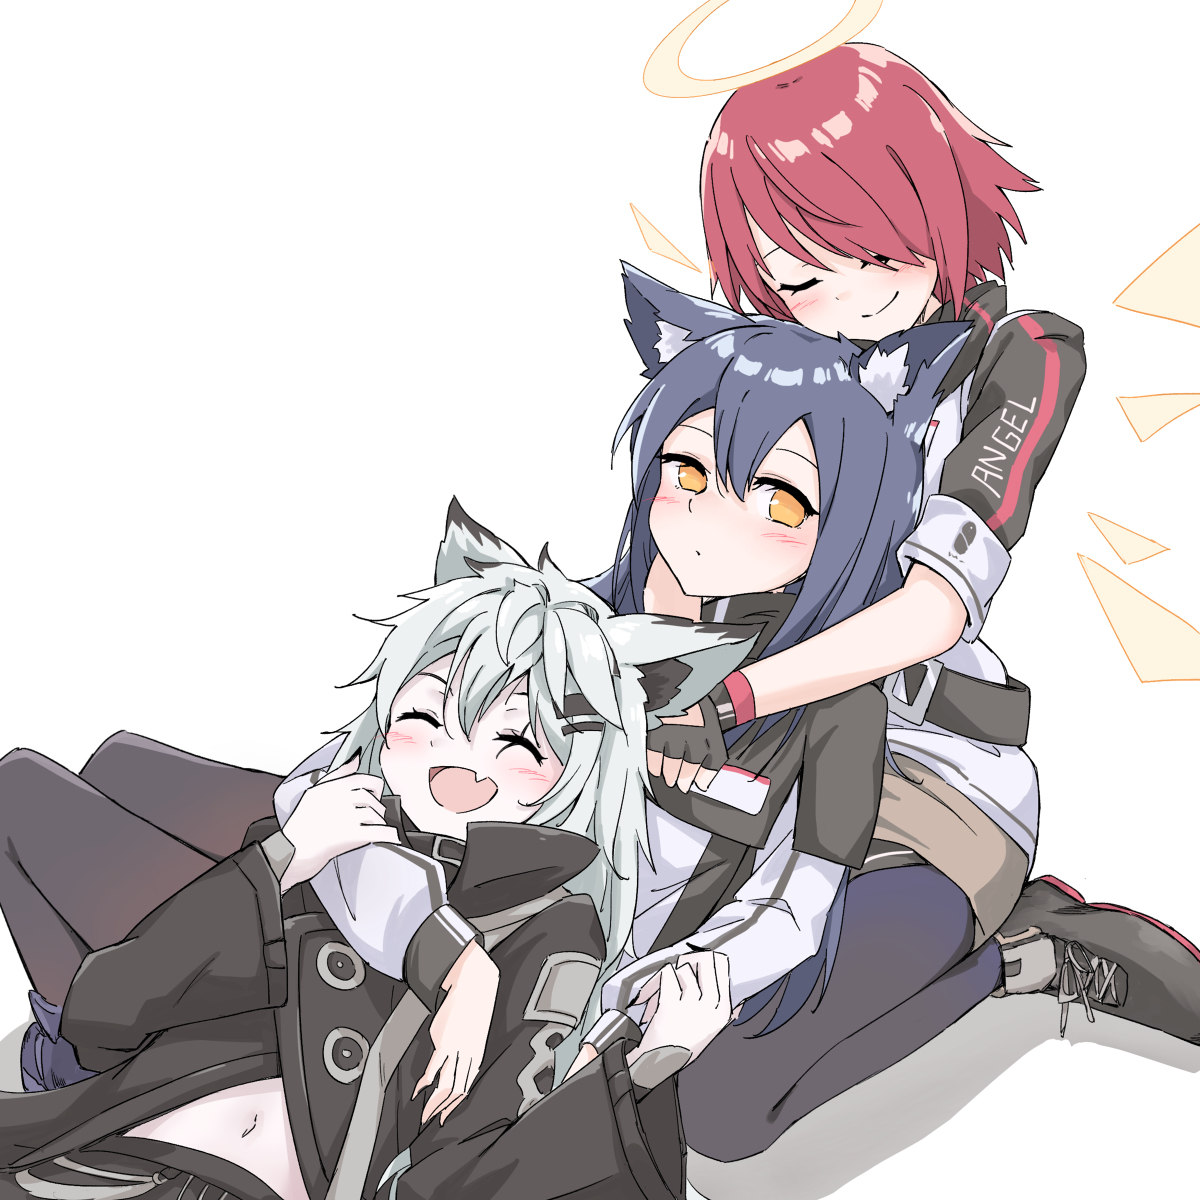

127.0.0.1 - - [27/Nov/2021 14:50:37] "GET /shutdown HTTP/1.1" 200 -


Server shutting down...


In [1]:
import threading
from json import dumps
from urllib.request import urlopen
import requests
from flask import Flask, request, send_file
from IPython.display import Image, display
from PIL import Image as PILImage
    
def connect():
    response = requests.get('http://127.0.0.1:1000/')
    response_data = response.json()
    print(response_data['message'])

    # 图像信息
    descriptor = urlopen('http://127.0.0.1:1000/cat')
    image = PILImage.open(descriptor)
    print(image.size)
    # 弹出窗口
    # image.show()
    
    # 显示在Jupyter的output
    
    display(Image(requests.get('http://127.0.0.1:1000/cat').content, width=600, height=600))
    
    # 终止服务器
    print(requests.get('http://127.0.0.1:1000/shutdown').text)


APP = Flask(__name__)

@APP.route('/', methods=['GET'])
def hello_():
    return dumps({"message" : "Hello World!"})

@APP.route('/cat', methods=['GET'])
def get_cat():
    address = "C:\\Users\\Zeal\\Pictures\\图片\\壁纸\\-klbw3Q5-erocZ1lT3cSxc-xc.jpg"
    return send_file(address, mimetype="image/jpg")

def shutdown_server():
    func = request.environ.get('werkzeug.server.shutdown')
    if func is None:
        raise RuntimeError('Not running with the Werkzeug Server')
    func()

@APP.route('/shutdown', methods=['GET'])
def shutdown():
    shutdown_server()
    return 'Server shutting down...'
    
if __name__ == '__main__':
    # 双线程，一个跑服务器一个跑requests
    threading.Timer(1, connect).start()
    print('Starting')
    APP.run(port=1000) 
    

#### **示例二**

In [ ]:
# heroes
from json import dumps
from flask import Flask, request

APP = Flask(__name__)

class Hero:
    def __init__(self, id, name, power):
        self.id = id
        self.name = name
        self.power = power

heroes = []

@APP.route('/heroes', methods=['GET'])
def get_all_heroes():
    return dumps([hero.__dict__ for hero in heroes])

@APP.route('/heroes/<id>', methods=['GET'])
def get_hero_by_id(id):
    requested_id = int(id)
    for hero in heroes:
        if hero.id == requested_id:
            return dumps(hero.__dict__)
    return dumps({})

@APP.route('/heroes/<id>', methods=['DELETE'])
def delete_hero_by_id(id):
    requested_id = int(id)
    for hero in heroes:
        if hero.id == requested_id:
            removed_hero = hero
            heroes.remove(hero)
            return dumps(removed_hero.__dict__)
    return dumps({})

@APP.route('/heroes', methods=['POST'])
def post_new_hero():
    request_data = request.get_json()
    new_hero = Hero(len(heroes), request_data['name'], request_data['power'])
    heroes.append(new_hero)
    return dumps(new_hero.__dict__)

if __name__ == '__main__':
    heroes.append(Hero(0, "Superman", "Super Strength"))
    heroes.append(Hero(1, "Wonder Woman", "Super Strength"))
    heroes.append(Hero(2, "Zeal", "Super Super Strength"))
    APP.run(port=2000)

### **Decorator 示例**

In [ ]:
def make_uppercase(fn):
	def wrapper(*args, **kwargs):
		return fn(*args, **kwargs).upper()
	return wrapper

@make_uppercase
def get_name():
	return "Zeal Liang"

if __name__ == '__main__':
    print(get_name())

In [ ]:
class Message:
    def __init__(self, id, text):
        self.id = id
        self.text = text

messages = [
    Message(1, "Hello"),
    Message(2, "How are you?"),
]

def get_message_by_id(id):
    # 因为这个列表里只会匹配到一个元素，所以末尾是[0]
    return [m for m in messages if m.id == id][0]

def message_id_to_obj(function):
    def wrapper(*args, **kwargs):
        # “*args”是一个tuple，所以需要[index]来访问
        argsList = list(args)
        argsList[0] = get_message_by_id(argsList[0])
        args = argsList
        return function(*args, **kwargs)
    return wrapper

@message_id_to_obj
def printMessage(message):
    print(message.text)

if __name__ == '__main__':
    printMessage(1)
    printMessage(2)

### **Threading 示例**

In [ ]:
import threading
from time import sleep
def hello():
    print("hello, Timer")

if __name__ == '__main__':
    t = threading.Timer(2.0, hello)
    t.start()
    print('Starting')
    print(1)
    sleep(1)
    print(2)

### **OOP and Class 示例**

In [ ]:
class Animal:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def cry(self):
        print(f"The animal named {self.name} is crying")

class Dog(Animal):
    def __init__(self, name, age, dog_breed):
        Animal.__init__(self, name, age)
        self.breed = dog_breed

    def cry(self):
        Animal.cry(self)
        print("Woof!")

animal = Animal("Cat", 2)
animal.cry()

dog = Dog("Dog", 3, "zzz")
dog.cry()

### **Progress bar 示例**

In [ ]:
from tqdm import tqdm
from time import sleep

for _ in tqdm(range(1000)):
    sleep(0.01)


def factorial(n, bar):
    bar.update(1)
    sleep(0.01)  # slow-down things a little bit
    if n == 1:
        return 1
    else:
        return n * factorial(n-1, bar)

n = 500
bar = tqdm(total=n)
print(factorial(n, bar=bar))


a = list('letters')
bar = tqdm(a)
for letter in bar:
    sleep(1)
    bar.set_description(f"Now get {letter}")


### **首字母缩写小程序**

In [ ]:

def acronym(input):
    return "It's acronym is " + ''.join([x[0] if x[0].isupper() else '' for x in input.split(' ')]) + '.'

print(acronym("People's Republic of China"))
print(acronym("University of New South Wales"))


### **生成器和迭代器示例**

In [ ]:
def shopping_list():
    yield 'apple'
    yield 'orange'
    yield 'banana'
    yield 'pineapple'
g = shopping_list()
print(next(g))
print(next(g))
for item in g:
    print(item)

def squares():
    i = 0
    while True:
        i += 1
        yield i * i
s = squares()
for i in s:
    if i > 100:
        break
    print(i, end=' ')

### **McCabe code complexity checker** 

In [ ]:
def foo():
    i = 0
    while i <= 9:
        if i % 3 == 0:
            print(i*2)
        else:
            print(i*3)
        i += 1
    print("done")
    

# pylint a.py --load-plugins=pylint.extensions.mccabe --max-complexity=0

from pylint.extensions import mccabe
mccabe.checkers.initialize(foo())